In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression  
#from sklearn.linear_model import LinearRegression
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.naive_bayes import GaussianNB
#from sklearn.svm import SVC
#from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score


In [46]:
#from google.colab import files
#files.upload()

In [8]:
price_data = pd.read_csv('avocado.csv')
price_data

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [9]:
price_data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [10]:
price_data.shape

(18249, 14)

In [11]:
price_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [12]:
price_data.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [13]:
price_data.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [14]:
price_data['type'].value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


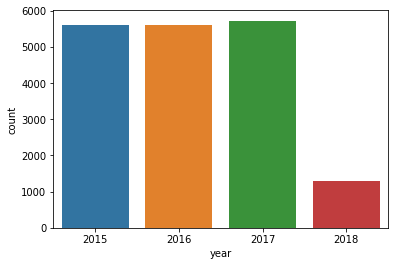

In [15]:
sns.countplot(price_data['year'], label = 'Count')

Unnamed: 0          AxesSubplot(0.125,0.71587;0.168478x0.16413)
AveragePrice     AxesSubplot(0.327174,0.71587;0.168478x0.16413)
4046             AxesSubplot(0.529348,0.71587;0.168478x0.16413)
4225             AxesSubplot(0.731522,0.71587;0.168478x0.16413)
4770               AxesSubplot(0.125,0.518913;0.168478x0.16413)
Total Bags      AxesSubplot(0.327174,0.518913;0.168478x0.16413)
Small Bags      AxesSubplot(0.529348,0.518913;0.168478x0.16413)
Large Bags      AxesSubplot(0.731522,0.518913;0.168478x0.16413)
XLarge Bags        AxesSubplot(0.125,0.321957;0.168478x0.16413)
year            AxesSubplot(0.327174,0.321957;0.168478x0.16413)
dtype: object

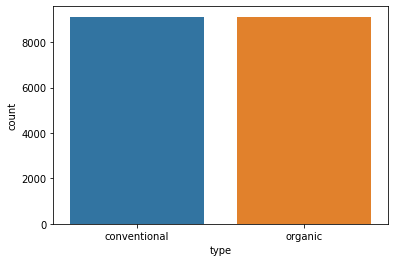

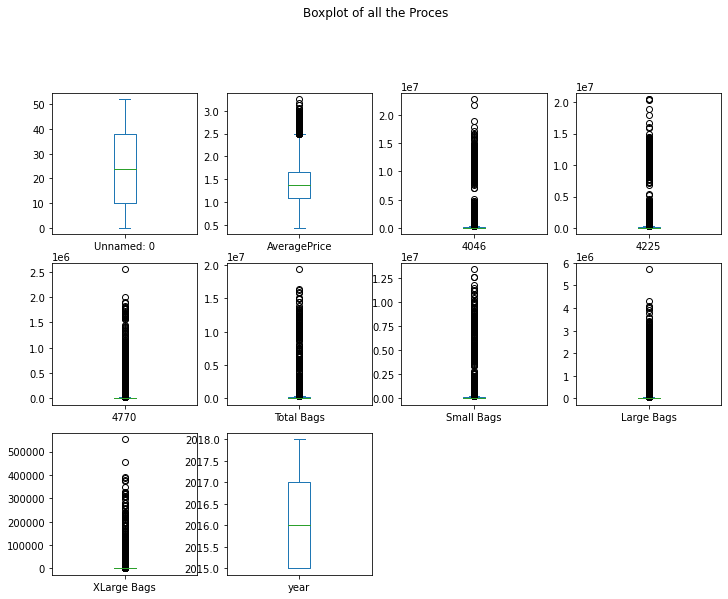

In [16]:
sns.countplot(x = 'type', data = price_data)
price_data.drop('Total Volume', axis = 1).plot(kind = 'box', subplots = True, layout = (4, 4), sharex = False, sharey = False, figsize = (12, 12), title = 'Boxplot of all the Proces')

In [17]:
price_data.replace({"type": {'conventional': 0, 'organic': 1}}, inplace = True)

In [18]:
price_data['region'].value_counts()

Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
NewYork                338
NewOrleansMobile       338
Nashville              338
Midsouth               338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago                338
C

<Figure size 432x288 with 0 Axes>

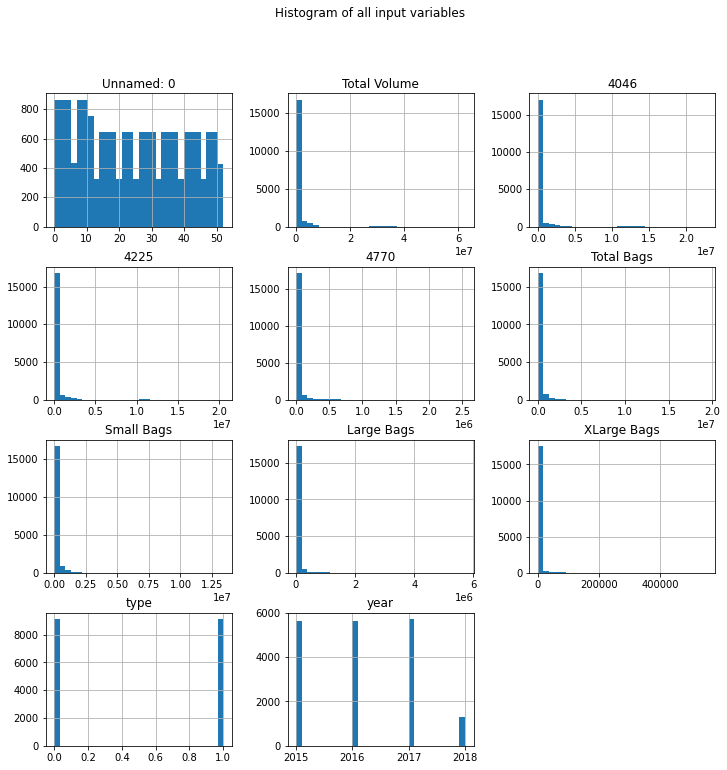

In [19]:
plt.savefig('Price Prediction')
plt.show()
import pylab as pl
price_data.drop('AveragePrice', axis = 1).hist(bins = 30, figsize = (12, 12))
pl.suptitle('Histogram of all input variables')
pl.savefig('hist_price')
pl.show()

In [20]:
X = price_data.drop(columns = 'type', axis = 1)
Y = price_data['type']

In [21]:
feature_names = ['Total Volume',	'Total Bags',	'Small Bags',	'Large Bags',	'XLarge Bags',	'year']
X = price_data[feature_names]
Y = price_data['type']

In [22]:
print(X)

       Total Volume  Total Bags  Small Bags  Large Bags  XLarge Bags  year
0          64236.62     8696.87     8603.62       93.25          0.0  2015
1          54876.98     9505.56     9408.07       97.49          0.0  2015
2         118220.22     8145.35     8042.21      103.14          0.0  2015
3          78992.15     5811.16     5677.40      133.76          0.0  2015
4          51039.60     6183.95     5986.26      197.69          0.0  2015
...             ...         ...         ...         ...          ...   ...
18244      17074.83    13498.67    13066.82      431.85          0.0  2018
18245      13888.04     9264.84     8940.04      324.80          0.0  2018
18246      13766.76     9394.11     9351.80       42.31          0.0  2018
18247      16205.22    10969.54    10919.54       50.00          0.0  2018
18248      17489.58    12014.15    11988.14       26.01          0.0  2018

[18249 rows x 6 columns]


In [23]:
print(Y)

0        0
1        0
2        0
3        0
4        0
        ..
18244    1
18245    1
18246    1
18247    1
18248    1
Name: type, Length: 18249, dtype: int64


In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state = 2)

In [25]:
print(X.shape, X_train.shape, X_test.shape)

(18249, 6) (16424, 6) (1825, 6)


In [26]:
print(X_train)

       Total Volume  Total Bags  Small Bags  Large Bags  XLarge Bags  year
2407     2486654.71   608182.51   397112.08   211033.90        36.53  2015
17324      13548.83    11218.51     1363.58     9854.93         0.00  2017
16092     120458.72    64166.52    34038.53    30127.99         0.00  2017
14826      21857.76    13076.07     1010.73    12065.34         0.00  2017
11218       6005.54      179.50      179.50        0.00         0.00  2015
...             ...         ...         ...         ...          ...   ...
14696       8433.01     1861.76     1804.65       57.11         0.00  2016
1099      237248.22    37333.35    36573.68      759.67         0.00  2015
11798     625259.00   178838.00   126058.00    52779.00         0.00  2015
6637      135854.22    63551.01    31441.95    32031.35        77.71  2017
2575       60370.27    24061.39    24061.39        0.00         0.00  2015

[16424 rows x 6 columns]


In [27]:
print(Y_train)

2407     0
17324    1
16092    1
14826    1
11218    1
        ..
14696    1
1099     0
11798    1
6637     0
2575     0
Name: type, Length: 16424, dtype: int64


In [28]:
#scaler = MinMaxScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.fit(X_test)


In [29]:
#lr = LogisticRegression()
#lr.predict(X_train, Y_train)
#print('Accuracy of Decision Tree Classifier {:2f})'.format(lr.score(X_train, Y_train)))

In [30]:
#dt = DecisionTreeClassifier().fit(X_train,Y_train)
#print('Accuracy of Decision Tree Classifier {:2f})'.format(dt.score(X_train, Y_train)))

In [31]:
model = LogisticRegression()

In [38]:
model.fit(X_train, Y_train)
LogisticRegression()

LogisticRegression()

**Method 1**

In [39]:
# Accuracy of training data
X_train_prediction = model.predict(X_train)
training_data_prediction = accuracy_score(X_train_prediction, Y_train)
print('Accuracy of training data : ', training_data_prediction)

Accuracy of training data :  0.9265708718947882


In [42]:
# Accuracy of testing data
X_test_prediction = model.predict(X_test)
testing_data_prediction = accuracy_score(X_test_prediction, Y_test)
print('Accuracy of testing data : ', testing_data_prediction)

Accuracy of testing data :  0.9189041095890411


 **Method 2**

In [45]:
lr = LogisticRegression()
lr.fit(X_test, Y_test)
print('Accuracy of Logistic Regression {:2f})'.format(lr.score(X_train, Y_train)))
print('Accuracy of Logistic Regression {:2f})'.format(lr.score(X_test, Y_test)))

Accuracy of Logistic Regression 0.922187)
Accuracy of Logistic Regression 0.911233)
